In [80]:
l1 = [0,1,1,1,0,0,0,1] 
l2 = [0,1,0,1,0,1,0,0]

In [81]:
def accuracy(y_true, y_pred):
    correct_counter = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1

    return correct_counter/len(y_true)

In [82]:
accuracy(l1, l2)

0.625

In [83]:
def confusion_matrix_values(y_true, y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
        elif yt == 0 and yp == 0:
            tn += 1
        elif yt == 1 and yp == 0:
            fn += 1
        elif yt == 0 and yp == 1:
            fp += 1
    
    return tp, tn, fp, fn

In [84]:
def precision(y_true, y_pred):
    tp, _, fp, _ = confusion_matrix_values(y_true, y_pred)

    precision = tp / (tp+fp)
    return precision

In [85]:
precision(l1, l2)

0.6666666666666666

In [86]:
def recall(y_true, y_pred):
    tp, _, _, fn = confusion_matrix_values(y_true, y_pred)

    recall = tp / (tp+fn)
    return recall

In [87]:
recall(l1, l2)

0.5

Thresholds

Text(0, 0.5, 'Precision')

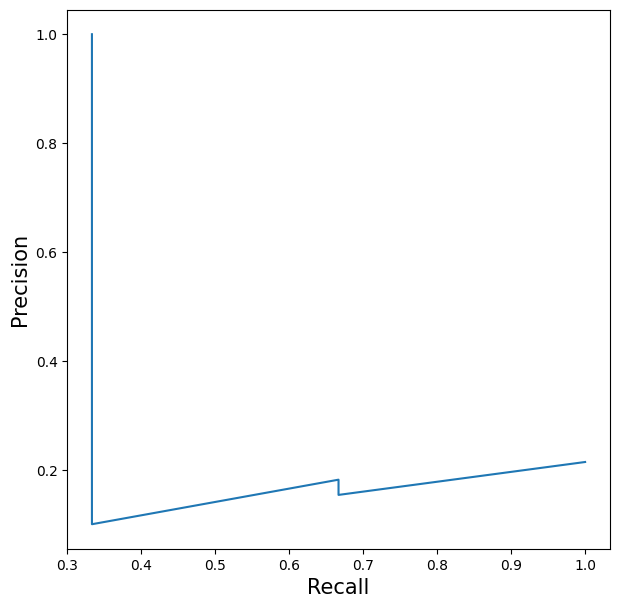

In [88]:
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937,  0.0191491,  0.17554844, 0.15952202, 0.03819563, 0.11639273,  0.079377,   0.08584789, 0.39095342,  0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905, 0.61977213, 0.33056815] 

precisions = []
recalls = []

thresholds = [0.0490937 , 0.05934905, 0.079377,  
              0.08584789, 0.11114267, 0.11639273,  
              0.15952202, 0.17554844, 0.18521942,  
              0.27259048, 0.31620708, 0.33056815,  
              0.39095342, 0.61977213] 

for i in thresholds:
    temp_pred = [1 if x>= i else 0 for x in y_pred]

    p = precision(y_true, temp_pred)
    r = recall(y_true, temp_pred)

    precisions.append(p)
    recalls.append(r)

plt.figure(figsize=(7, 7)) 
plt.plot(recalls, precisions) 
plt.xlabel('Recall', fontsize=15) 
plt.ylabel('Precision', fontsize=15)

In [89]:
def F1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    f1 = 2 * p * r/(p + r)
    return f1

In [90]:
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

In [91]:
def fpr(y_true, y_pred):
    tp, tn, fp, fn = confusion_matrix_values(y_true, y_pred)

    return fp / (tn + fp)

In [92]:
tpr_list = []
fpr_list = []

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1] 
 
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99] 
 
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0] 
 
for thresh in thresholds:  
    temp_pred = [1 if x >= thresh else 0 for x in y_pred] 

    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)

    tpr_list.append(temp_tpr) 
    fpr_list.append(temp_fpr)

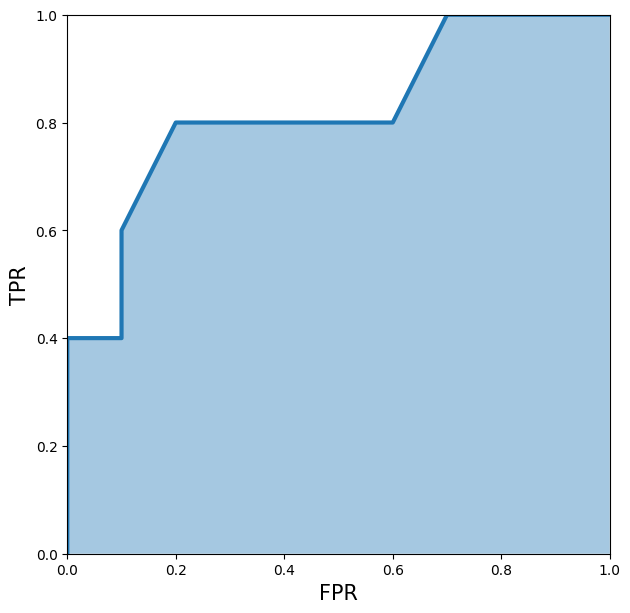

In [93]:
plt.figure(figsize=(7, 7)) 
plt.fill_between(fpr_list, tpr_list, alpha=0.4) 
plt.plot(fpr_list, tpr_list, lw=3) 
plt.xlim(0, 1.0) 
plt.ylim(0, 1.0) 
plt.xlabel('FPR', fontsize=15) 
plt.ylabel('TPR', fontsize=15) 
plt.show()

In [94]:
from sklearn import metrics
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1] 
 
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99] 

metrics.roc_auc_score(y_true, y_pred) 

0.8300000000000001

In [95]:
import numpy as np
def log_loss(y_true, y_proba):
    loss = []
    epsilon = 1e-15
    for yt, yp in zip(y_true, y_proba):
        yp = np.clip(yp, epsilon, 1-epsilon)

        temp_loss = - 1.0 * (yt * np.log(yp)  + (1 - yt) * np.log(1 - yp)) 
        loss.append(temp_loss)
    
    return np.mean(loss)
        

In [96]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99] 

log_loss(y_true, y_proba)

0.49882711861432294

In [97]:
def macro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    precision = 0

    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        tp, tn, fp, fn = confusion_matrix_values(temp_true, temp_pred)
        temp_precision = tp / (tp+fp)

        precision += temp_precision
    
    precision /= num_classes
    return precision

In [98]:
def micro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    tp = 0
    fp = 0

    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true] 
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        tp1, tn, fp1 , fn = confusion_matrix_values(temp_true, temp_pred)

        tp += tp1
        fp += fp1
    
    precision = tp / (tp+fp)
    return precision

In [99]:
from collections import Counter 
import numpy as np 
 
 
def weighted_precision(y_true, y_pred): 
    num_classes = len(np.unique(y_true)) 
    class_counts = Counter(y_true) 
    precision = 0 
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true] 
        temp_pred = [1 if p == class_ else 0 for p in y_pred] 
        
        tp, tn, fp, fn = confusion_matrix_values(temp_true, temp_pred) 
    
        temp_precision = tp / (tp + fp)
        weighted_precision = class_counts[class_] * temp_precision 
        precision += weighted_precision 
    overall_precision = precision / len(y_true) 
    return overall_precision

In [100]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2] 
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]


In [101]:
macro_precision(y_true, y_pred)

0.3611111111111111

In [102]:
micro_precision(y_true, y_pred)

0.4444444444444444

In [103]:
weighted_precision(y_true, y_pred)

0.39814814814814814

In [104]:
def pk(y_true, y_pred, k):  
    if k == 0: 
        return 0 
    
    y_pred = y_pred[:k] 
    pred_set = set(y_pred)
    true_set = set(y_true)
    common_values = pred_set.intersection(true_set) 
    
    return len(common_values) / len(y_pred[:k]) 

In [105]:
def apk(y_true, y_pred, k): 
    pk_values = [] 
    for i in range(1, k + 1): 
        pk_values.append(pk(y_true, y_pred, i)) 
        
    if len(pk_values) == 0: 
        return 0 
     
    return sum(pk_values) / len(pk_values)

In [106]:
y_true = [[1, 2, 3], [0, 2], [1], [2, 3], [1, 0], []]
y_pred = [[0, 1, 2], [1], [0, 2, 3], [2, 3, 4, 0], [0, 1, 2], [0]]